# Model on MediaEval Dev Dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sys, os, requests, glob
from PIL import Image

### Start From Pickle

In [28]:
df = pd.read_pickle('dev.pkl')
df.head()

,tweetText,label,num_words,text_length,contains_questmark,num_questmark,contains_exclammark,num_exclammark,contains_happyemo,contains_sademo,...,num_friends,num_followers,folfriend_ratio,times_listed,has_url,is_verified,num_tweets,imageId,imagePath,event
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-29 22:34:01,¿Se acuerdan de la película: “El día después d...,0,22,134,1,1,0,0,0,0,...,283,1651,5.833922,64,0,0,43811,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy
2012-10-30 21:11:37,@calbartos: @DJsmethy http://t.co/3ZTmD7Ai #h...,0,5,79,0,0,0,0,0,0,...,32,1,0.031250,0,0,0,16,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy
2012-10-30 15:52:45,"New york is in trouble,sandy's heavy strike.16...",0,9,74,0,0,0,0,0,0,...,2,0,0.000000,0,0,0,4,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy
2012-10-30 02:29:36,Damn!!\n#Sandy\n http://t.co/IXL8lhgD,0,2,35,0,0,1,2,0,0,...,321,147,0.457944,0,1,0,3052,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy
2012-10-30 15:25:08,Now THAT is scary. Take care people. #Sandy ht...,0,8,64,0,0,0,0,0,0,...,69,38,0.550725,0,0,0,447,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy


In [29]:
img = pd.read_pickle('img_diversity.pkl')
img.reset_index(inplace = True)
img

,event,label,VCS,VCoS,VDS
0,boston,0,0.714928,0.448832,4.129190
1,boston,1,0.722243,0.452021,3.941849
2,columbianChemicals,0,0.743426,0.462381,2.534407
3,malaysia,0,0.810919,0.436661,5.250847
4,sandy,0,0.709435,0.353685,18.899307
5,sandy,1,0.702138,0.399166,31.127527
6,sochi,0,0.780510,0.466992,3.219697


In [30]:
df = pd.merge(df, img, on = ['event', 'label'])
df.head()

,tweetText,label,num_words,text_length,contains_questmark,num_questmark,contains_exclammark,num_exclammark,contains_happyemo,contains_sademo,...,times_listed,has_url,is_verified,num_tweets,imageId,imagePath,event,VCS,VCoS,VDS
0,¿Se acuerdan de la película: “El día después d...,0,22,134,1,1,0,0,0,0,...,64,0,0,43811,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy,0.709435,0.353685,18.899307
1,@calbartos: @DJsmethy http://t.co/3ZTmD7Ai #h...,0,5,79,0,0,0,0,0,0,...,0,0,0,16,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy,0.709435,0.353685,18.899307
2,"New york is in trouble,sandy's heavy strike.16...",0,9,74,0,0,0,0,0,0,...,0,0,0,4,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy,0.709435,0.353685,18.899307
3,Damn!!\n#Sandy\n http://t.co/IXL8lhgD,0,2,35,0,0,1,2,0,0,...,0,1,0,3052,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy,0.709435,0.353685,18.899307
4,Now THAT is scary. Take care people. #Sandy ht...,0,8,64,0,0,0,0,0,0,...,0,0,0,447,sandyA_fake_46,./MediaEval/mediaeval2015/devset/Medieval2015_...,sandy,0.709435,0.353685,18.899307


In [31]:
df.describe()

,label,num_words,text_length,contains_questmark,num_questmark,contains_exclammark,num_exclammark,contains_happyemo,contains_sademo,contains_firstorderpron,...,num_friends,num_followers,folfriend_ratio,times_listed,has_url,is_verified,num_tweets,VCS,VCoS,VDS
count,13747.00000,13747.000000,13747.000000,13747.000000,13747.000000,13747.000000,13747.00000,13747.000000,13747.000000,13747.00000,...,13747.000000,1.374700e+04,13747.000000,13747.000000,13747.000000,13747.000000,13747.000000,13747.000000,13747.000000,13747.000000
mean,0.35164,10.201499,88.674838,0.060231,0.081836,0.204990,0.39194,0.005892,0.004874,0.06816,...,666.517131,4.535953e+03,18.650375,70.776970,0.397905,0.008947,9897.106132,0.713600,0.379282,21.301155
std,0.47750,5.412276,32.820228,0.237924,0.382862,0.403709,1.01889,0.076537,0.069645,0.25203,...,3531.784652,9.945704e+04,658.952030,1497.828846,0.489483,0.094170,20332.172121,0.023290,0.032999,8.212253
min,0.00000,1.000000,26.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.702138,0.353685,2.534407
25%,0.00000,6.000000,61.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,137.000000,8.300000e+01,0.407367,0.000000,0.000000,0.000000,881.000000,0.702138,0.353685,18.899307
50%,0.00000,10.000000,88.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,273.000000,2.150000e+02,0.769737,1.000000,0.000000,0.000000,3343.000000,0.709435,0.353685,18.899307
75%,1.00000,14.000000,119.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,563.000000,5.760000e+02,1.269279,7.000000,1.000000,0.000000,10232.000000,0.709435,0.399166,31.127527
max,1.00000,28.000000,237.000000,1.000000,6.000000,1.000000,15.00000,1.000000,1.000000,1.00000,...,199198.000000,6.541611e+06,55745.000000,110769.000000,1.000000,1.000000,765562.000000,0.810919,0.466992,31.127527


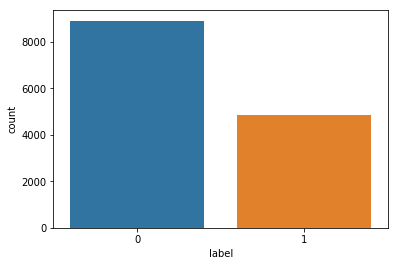

In [32]:
sns.countplot('label', data = df)

In [33]:
true_label = df['label'].sum()
false_label = df.shape[0] - true_label
weight = false_label / true_label
weight

1.8438146462556888

In [34]:
label = df['label']

drop_features = ['tweetText', 'imageId', 'event', 'imagePath', 'label']
df.drop(drop_features, axis = 1, inplace = True)

In [35]:
bool_features = df.columns[(df.min(axis = 0) == 0) & (df.max(axis = 0) == 1)]
numeric_features = list(set(df.columns) - set(bool_features))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13747 entries, 0 to 13746
Data columns (total 28 columns):
num_words                   13747 non-null int64
text_length                 13747 non-null int64
contains_questmark          13747 non-null int64
num_questmark               13747 non-null int64
contains_exclammark         13747 non-null int64
num_exclammark              13747 non-null int64
contains_happyemo           13747 non-null int64
contains_sademo             13747 non-null int64
contains_firstorderpron     13747 non-null int64
contains_secondorderpron    13747 non-null int64
contains_thirdorderpron     13747 non-null int64
num_uppercasechars          13747 non-null int64
num_possentiwords           13747 non-null float64
num_negsentiwords           13747 non-null float64
num_mentions                13747 non-null int64
num_hashtags                13747 non-null int64
num_URLs                    13747 non-null int64
num_retweets                13747 non-null int64
num_f

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, label, random_state = 23)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:, numeric_features] = scaler.fit_transform(X_train.loc[:, numeric_features])
X_test.loc[:, numeric_features] = scaler.transform(X_test.loc[:, numeric_features])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [51]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2245
           1       0.34      0.35      0.35      1192

   micro avg       0.54      0.54      0.54      3437
   macro avg       0.50      0.50      0.50      3437
weighted avg       0.54      0.54      0.54      3437



In [43]:
from sklearn.svm import SVC

svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

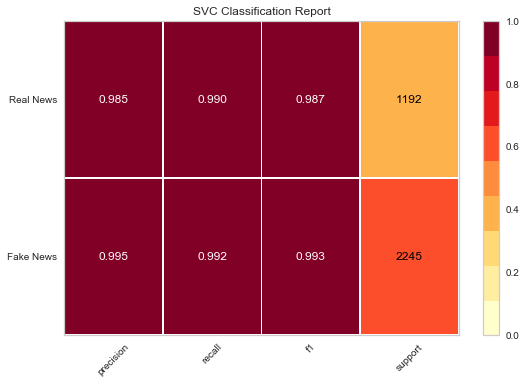

In [52]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

visualizer = ClassificationReport(svc, classes = ['Fake News', 'Real News'],\
                                  support = True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

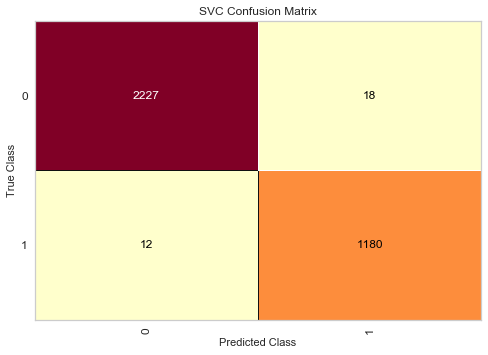

In [53]:
visualizer = ConfusionMatrix(svc)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10310 entries, 2473 to 8787
Data columns (total 28 columns):
num_words                   10310 non-null float64
text_length                 10310 non-null float64
contains_questmark          10310 non-null int64
num_questmark               10310 non-null float64
contains_exclammark         10310 non-null int64
num_exclammark              10310 non-null float64
contains_happyemo           10310 non-null int64
contains_sademo             10310 non-null int64
contains_firstorderpron     10310 non-null int64
contains_secondorderpron    10310 non-null int64
contains_thirdorderpron     10310 non-null int64
num_uppercasechars          10310 non-null float64
num_possentiwords           10310 non-null float64
num_negsentiwords           10310 non-null float64
num_mentions                10310 non-null float64
num_hashtags                10310 non-null float64
num_URLs                    10310 non-null float64
num_retweets                10310 no

In [56]:
image_features = ['VCS', 'VCoS', 'VDS']
X_train.drop(image_features, inplace = True, axis = 1)
X_test.drop(image_features, inplace = True, axis = 1)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


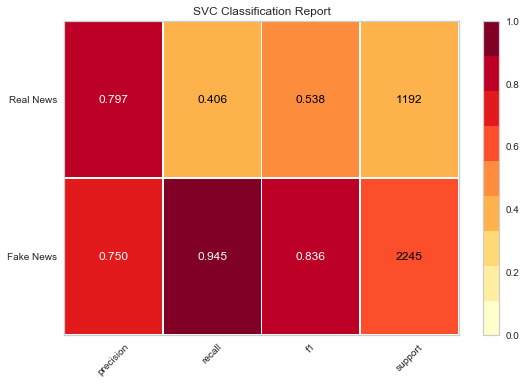

In [59]:
svc = SVC(gamma = 'auto')

visualizer = ClassificationReport(svc, classes = ['Fake News', 'Real News'],\
                                  support = True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()